In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [2]:
budget = np.array([5,10,17,37,35,40,42,49,54,60])
revenue = np.array([2.6,19.0,23.8,26.9,41.1,58.3,40.3,58.7,73.1,69.7])

In [3]:
df = pd.DataFrame(data ={'revenue':revenue,'budget':budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,37
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


Text(0, 0.5, 'revenue')

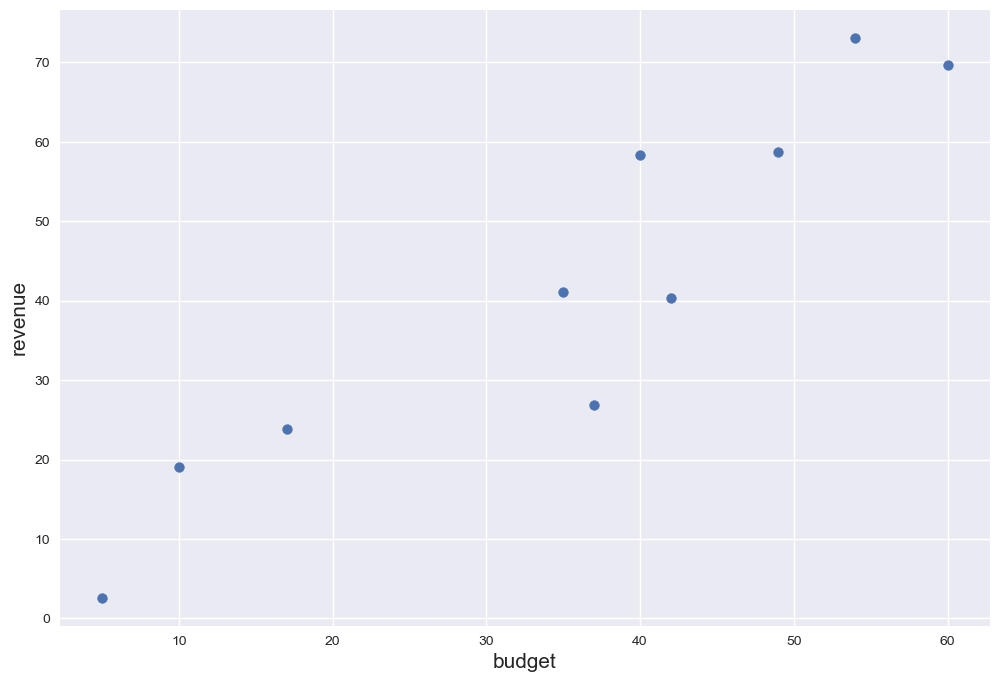

In [4]:
plt.figure(figsize = (12,8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel('budget', fontsize = 15)
plt.ylabel('revenue', fontsize = 15)

In [5]:
# Linear Regression

from sklearn.linear_model import LinearRegression

In [6]:
lm = LinearRegression(fit_intercept = True)
lm.fit(X = df.budget.to_frame(), y = df.revenue)

LinearRegression()

In [7]:
slope = lm.coef_
slope

array([1.17100904])

In [8]:
intercept = lm.intercept_
intercept

0.4817845540223189

In [9]:
df['pred'] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.336830
1,19.0,10,12.191875
2,23.8,17,20.388938
3,26.9,37,43.809119
4,41.1,35,41.467101
5,58.3,40,47.322146
6,40.3,42,49.664164
7,58.7,49,57.861227
8,73.1,54,63.716273
9,69.7,60,70.742327


In [10]:
x_lin = np.array([0,100])
y_lin = intercept + slope * x_lin

In [11]:
y_lin

array([  0.48178455, 117.58268841])

Text(0, 0.5, 'revenue')

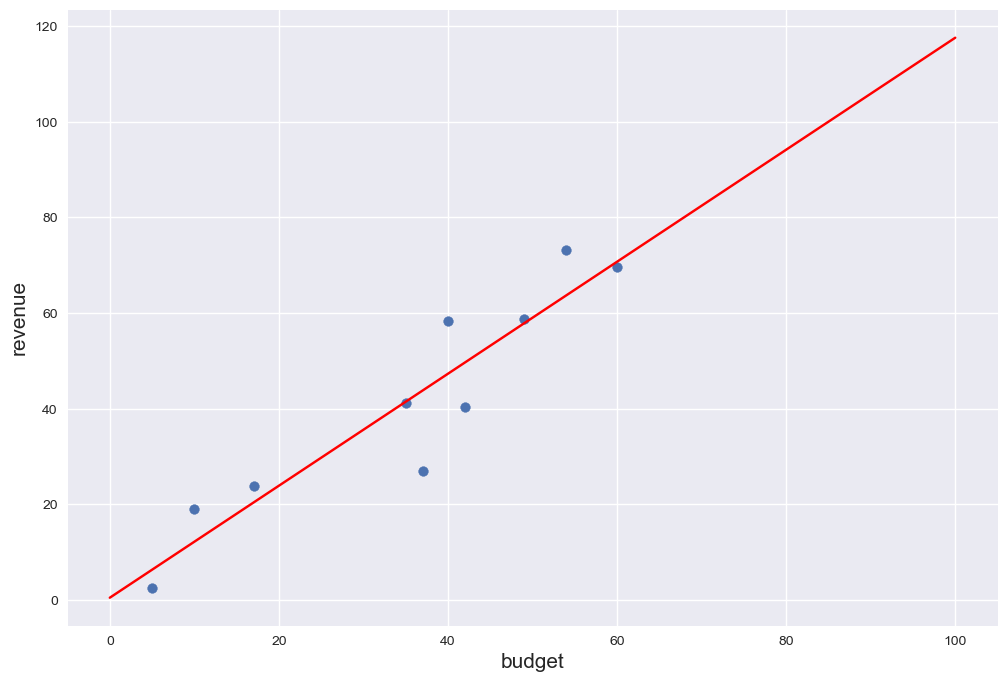

In [12]:
plt.figure(figsize = (12,8))
plt.scatter(x = df.budget, y = df.revenue, label = 'Data')
plt.plot(x_lin, y_lin, c='red', label = 'Regression Line')
plt.xlabel('budget', fontsize = 15)
plt.ylabel('revenue', fontsize = 15)

In [13]:
budget_new = np.array([63,66,74,80,85])
revenue_new = np.array([74.5,80.7,98.3,94.8,101.7])

In [14]:
df_new = pd.DataFrame(data = {'revenue':revenue_new,'budget':budget_new})
df_new

,revenue,budget
0,74.5,63
1,80.7,66
2,98.3,74
3,94.8,80
4,101.7,85


In [15]:
df_new['pred'] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.5,63,74.255354
1,80.7,66,77.768381
2,98.3,74,87.136453
3,94.8,80,94.162508
4,101.7,85,100.017553


Text(0, 0.5, 'revenue')

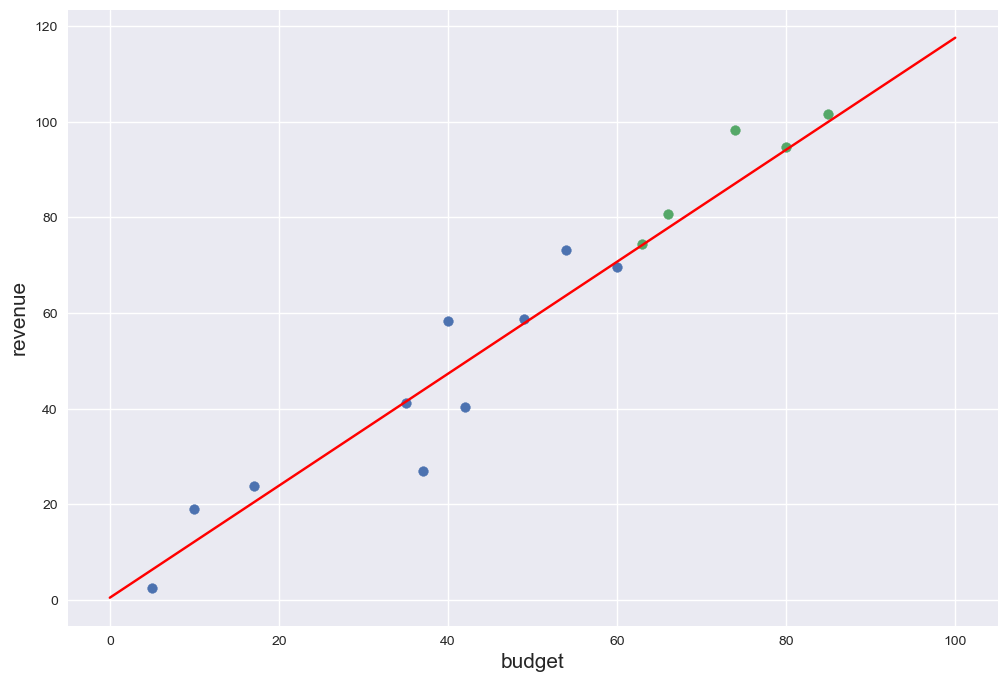

In [16]:
plt.figure(figsize = (12,8))
plt.scatter(x = df.budget, y = df.revenue, label = 'Data')
plt.plot(x_lin, y_lin, c='red', label = 'Regression Line')
plt.scatter(x = df_new.budget, y = df_new.revenue, label = 'New Data')
plt.xlabel('budget', fontsize = 15)
plt.ylabel('revenue', fontsize = 15)

In [17]:
poly_m =  np.polyfit(x= df.budget, y = df.revenue, deg = 9)

In [18]:
poly_m

array([ 1.58486343e-08, -4.91263282e-06,  6.52352040e-04, -4.84037783e-02,
        2.19340078e+00, -6.22568188e+01,  1.09048552e+03, -1.11462516e+04,
        5.89261722e+04, -1.19519294e+05])

(0.0, 300.0)

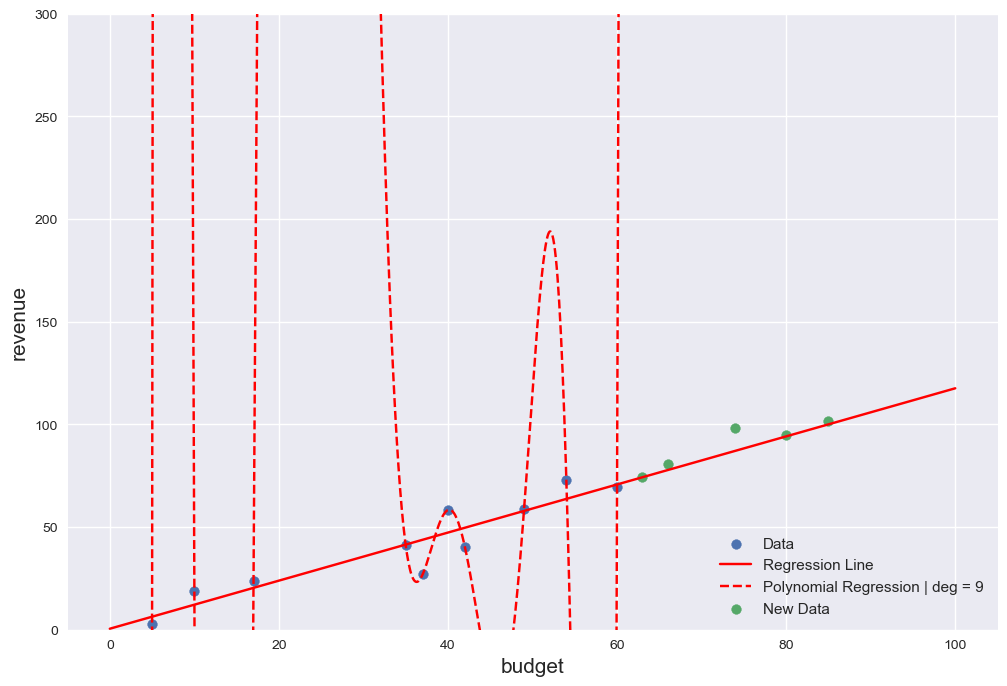

In [19]:
x_poly = np.linspace(0,100,1000)
y_poly = np.polyval(poly_m, x_poly)
plt.figure(figsize = (12,8))
plt.scatter(x = df.budget, y = df.revenue, label = 'Data')
plt.plot(x_lin, y_lin, c='red', label = 'Regression Line')
plt.plot(x_poly, y_poly, c='red', label = 'Polynomial Regression | deg = 9', linestyle = '--')
plt.scatter(x = df_new.budget, y = df_new.revenue, label = 'New Data')
plt.xlabel('budget', fontsize = 15)
plt.ylabel('revenue', fontsize = 15)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0,300)

In [20]:
mean = df.revenue.mean()
mean

41.349999999999994

(0.0, 300.0)

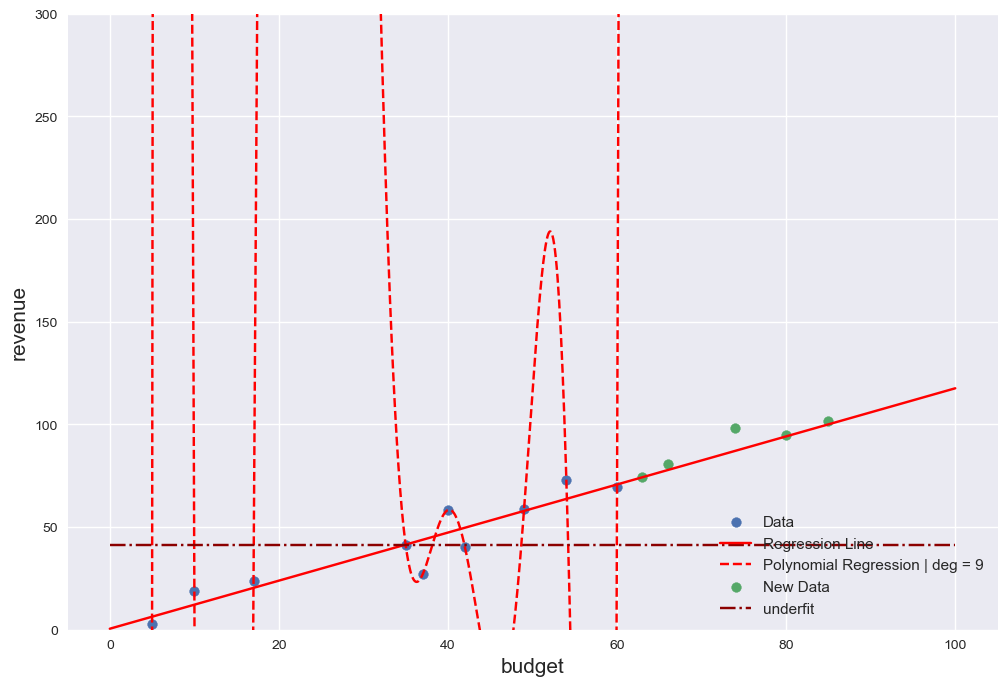

In [21]:
plt.figure(figsize = (12,8))
plt.scatter(x = df.budget, y = df.revenue, label = 'Data')
plt.plot(x_lin, y_lin, c='red', label = 'Regression Line')
plt.plot(x_poly, y_poly, c='red', label = 'Polynomial Regression | deg = 9', linestyle = '--')
plt.scatter(x = df_new.budget, y = df_new.revenue, label = 'New Data')
plt.hlines(y = mean, xmin = 0, xmax = 100, linestyle = '-.', color = 'darkred', label = 'underfit')
plt.xlabel('budget', fontsize = 15)
plt.ylabel('revenue', fontsize = 15)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0,300)

# LogisticRegression

In [23]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

(-0.2, 1.2)

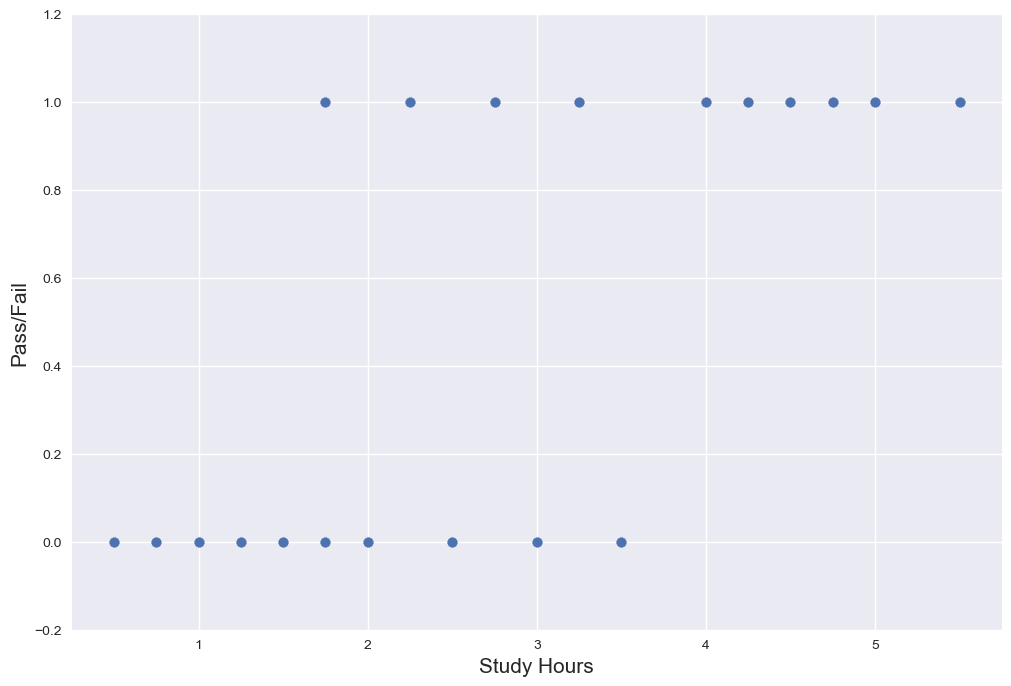

In [24]:
plt.figure(figsize = (12,8))
plt.scatter(x = hours, y = success)
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Pass/Fail', fontsize = 15)
plt.ylim(-0.2, 1.2)

In [25]:
data = pd.DataFrame(data = {'hours':hours,'success':success})
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [26]:
lm = LinearRegression(fit_intercept = True)

In [27]:
lm.fit(data.hours.to_frame(), data.success)

LinearRegression()

In [28]:
lm.coef_

array([0.23459561])

In [29]:
lm.intercept_

-0.1539352689884873

In [30]:
data['pred'] = lm.predict(data.hours.to_frame())

In [31]:
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


(-0.2, 1.2)

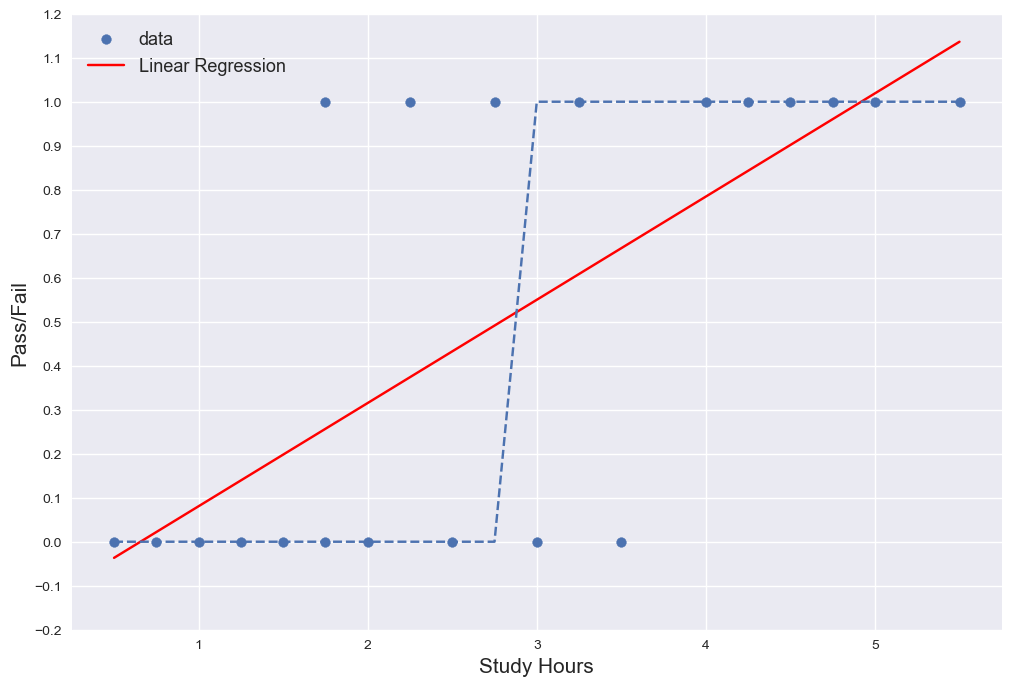

In [32]:
plt.figure(figsize = (12,8))
plt.scatter(x = data.hours, y = data.success, label = 'data')
plt.plot(data.hours, data.pred, color = 'red', label = 'Linear Regression')
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = '--')
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Pass/Fail', fontsize = 15)
plt.ylim(-0.2, 1.2)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lm = LogisticRegression()

In [35]:
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


In [36]:
lm.fit(data.hours.to_frame(), data.success)

LogisticRegression()

In [37]:
data['pred'] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


(-0.2, 1.2)

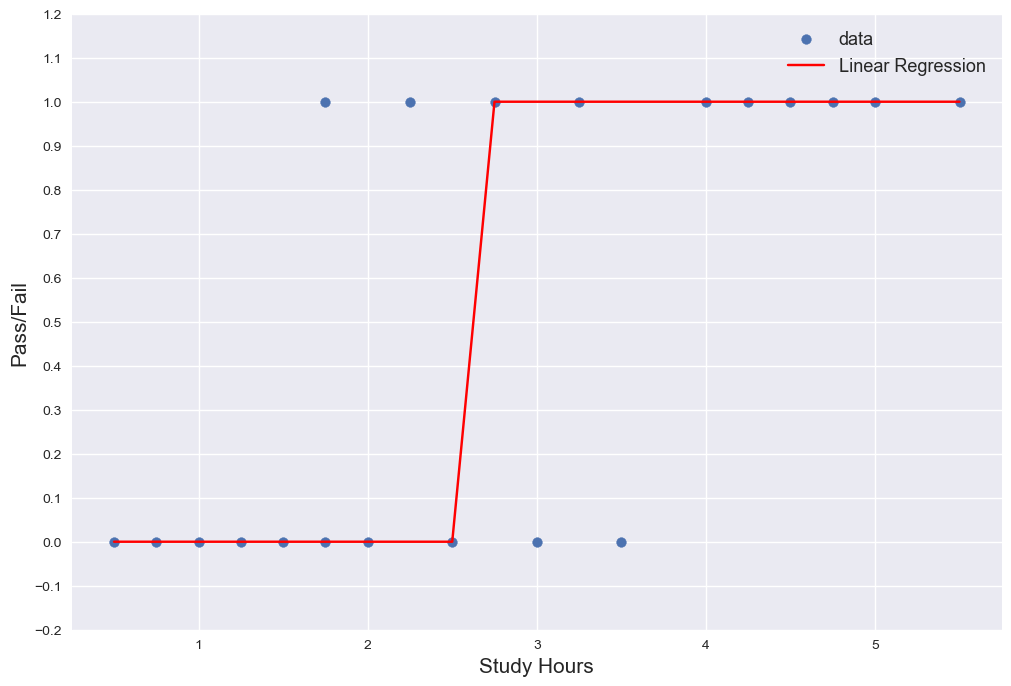

In [38]:
plt.figure(figsize = (12,8))
plt.scatter(x = data.hours, y = data.success, label = 'data')
plt.plot(data.hours, data.pred, color = 'red', label = 'Linear Regression')
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Pass/Fail', fontsize = 15)
plt.ylim(-0.2, 1.2)


In [39]:
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.92858952, 0.07141048],
       [0.90704455, 0.09295545],
       [0.87984046, 0.12015954],
       [0.84602638, 0.15397362],
       [0.80480773, 0.19519227],
       [0.75574059, 0.24425941],
       [0.75574059, 0.24425941],
       [0.69895285, 0.30104715],
       [0.63533317, 0.36466683],
       [0.56660539, 0.43339461],
       [0.49521602, 0.50478398],
       [0.42402118, 0.57597882],
       [0.3558463 , 0.6441537 ],
       [0.29305565, 0.70694435],
       [0.18924992, 0.81075008],
       [0.14905371, 0.85094629],
       [0.11617173, 0.88382827],
       [0.08977835, 0.91022165],
       [0.06891381, 0.93108619],
       [0.04000986, 0.95999014]])

(-0.2, 1.2)

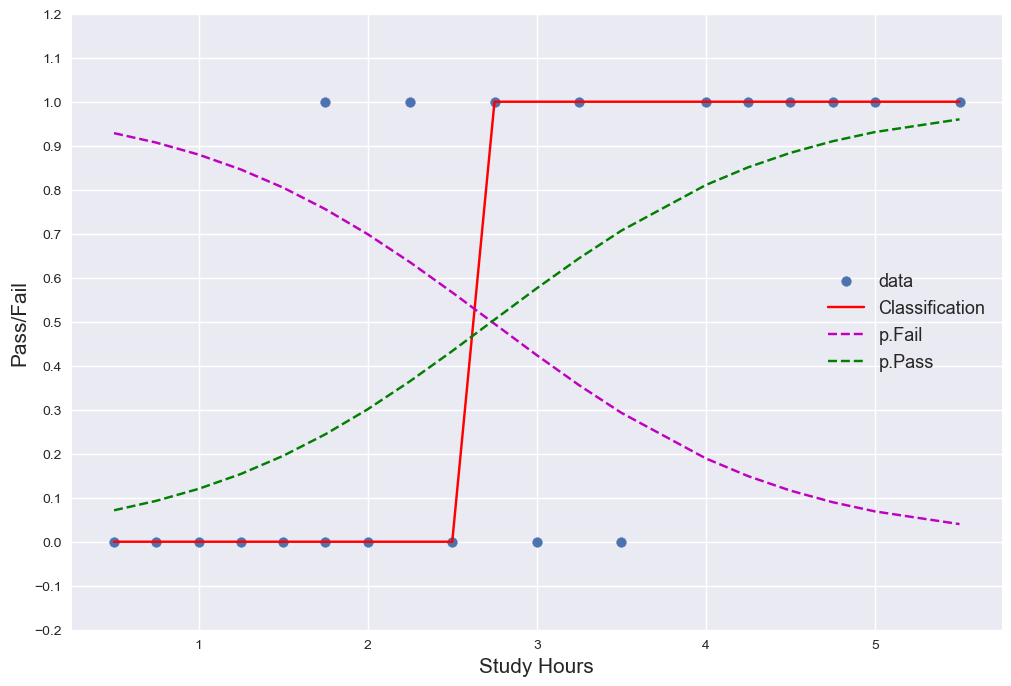

In [40]:
plt.figure(figsize = (12,8))
plt.scatter(x = data.hours, y = data.success, label = 'data')
plt.plot(data.hours, data.pred, color = 'red', label = 'Classification')
plt.plot(data.hours, proba[:, 0], 'm--', label = 'p.Fail')
# -> 확률의 0열을 선택
plt.plot(data.hours, proba[:, 1], 'g--', label = 'p.Pass')
# -> 확률의 1열을 선택
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.xlabel('Study Hours', fontsize = 15)
plt.ylabel('Pass/Fail', fontsize = 15)
plt.ylim(-0.2, 1.2)

In [41]:
import seaborn as sns

In [42]:
df = pd.read_csv('csv/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
df.loc[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [45]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [46]:
df.describe(include = 'O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [47]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [48]:
df.total_rooms.value_counts()

1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: total_rooms, Length: 5926, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

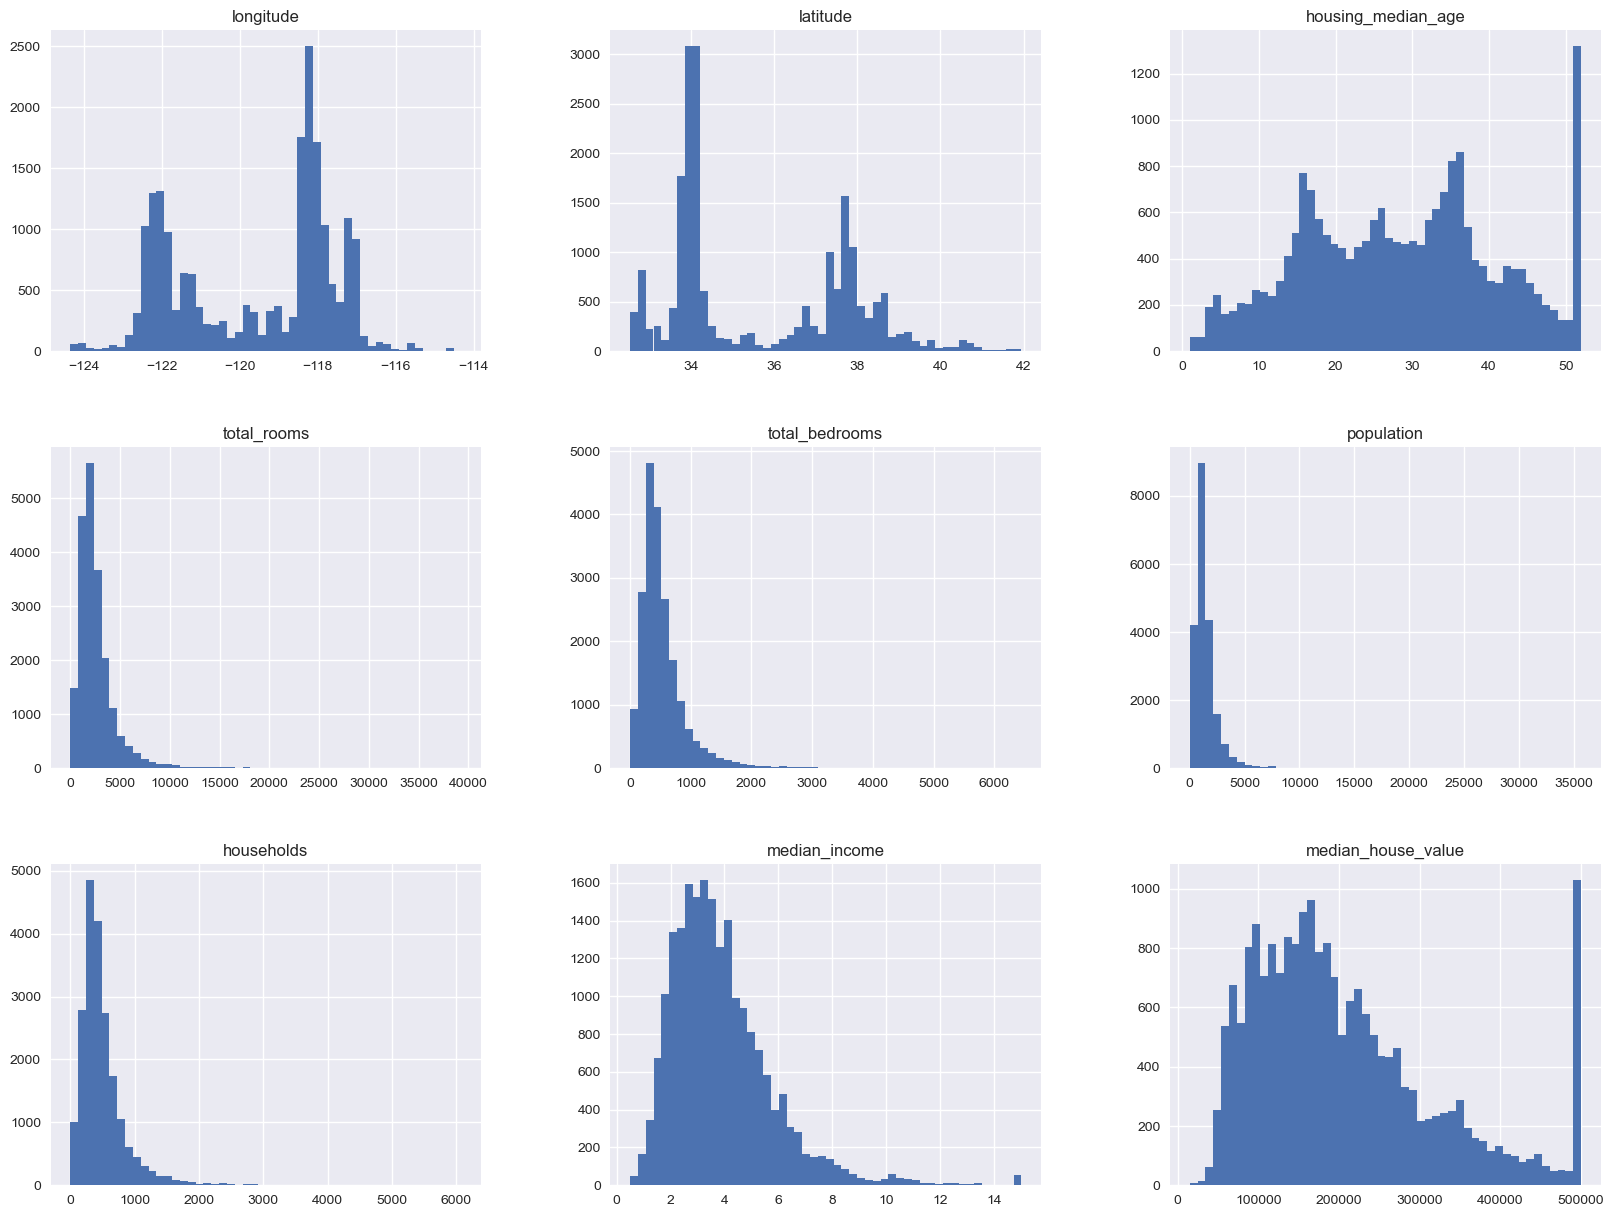

In [49]:
df.hist(bins = 50, figsize = (20,15))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
df.dropna(inplace = True)

In [52]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
df['rooms_per_household'] = df.total_rooms.div(df.households)

In [54]:
df.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [55]:
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [56]:
df['pop_per_household'] = df.population.div(df.households)

In [57]:
df['bedrooms_per_room'] = df.total_bedrooms.div(df.total_rooms)

In [58]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


<AxesSubplot:>

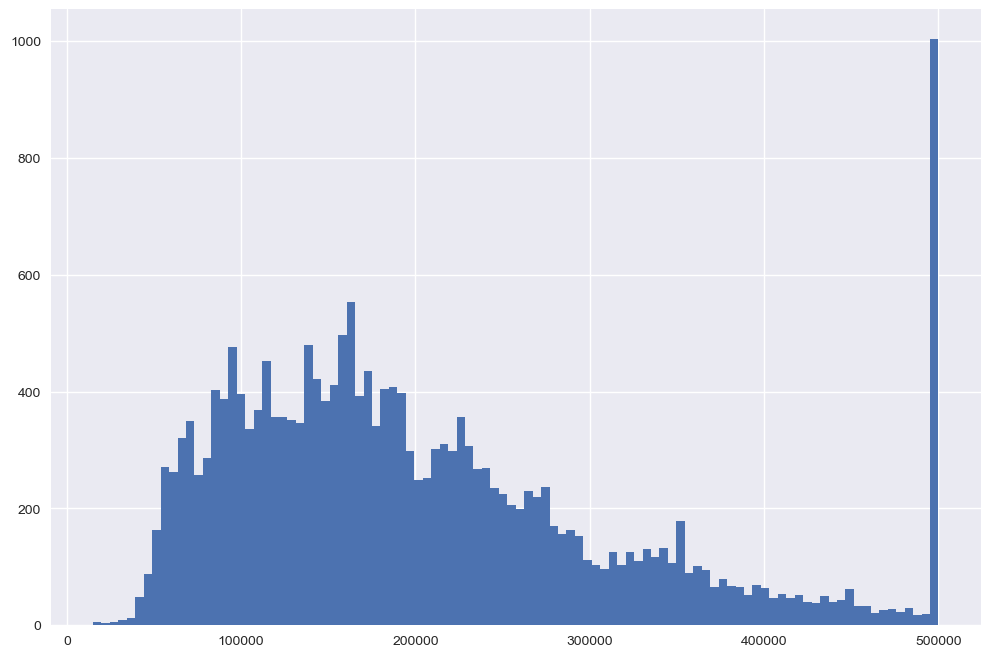

In [59]:
df.median_house_value.hist(bins = 100, figsize = (12,8))

In [60]:
df.corr().median_house_value.sort_values(ascending = False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

<AxesSubplot:>

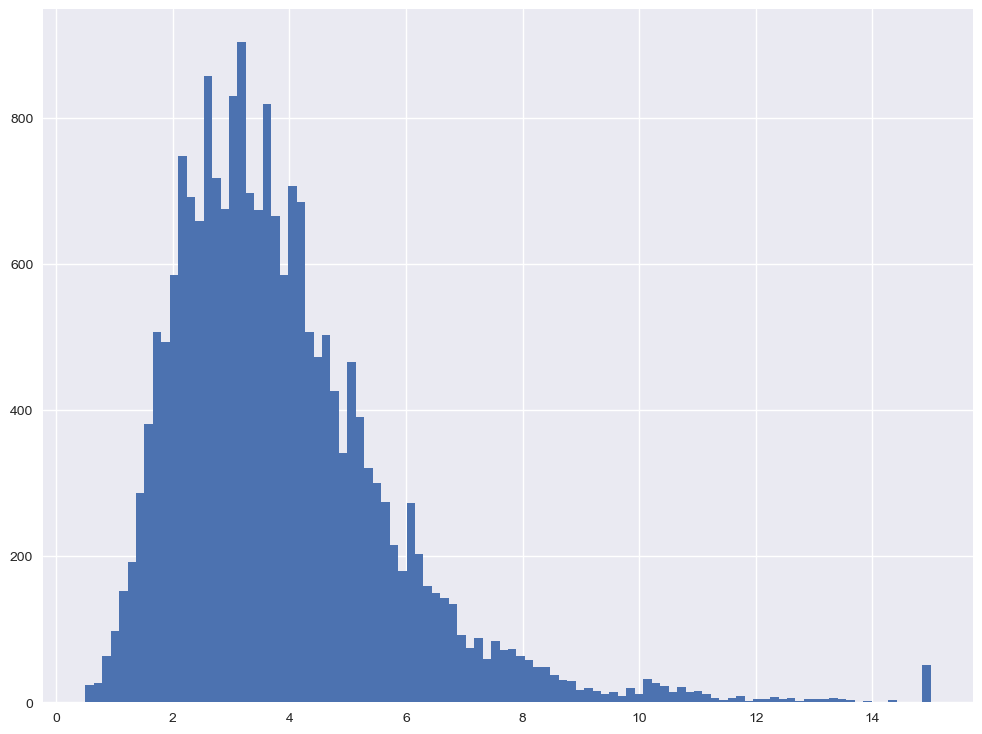

In [61]:
df.median_income.hist(bins = 100, figsize = (12,9))

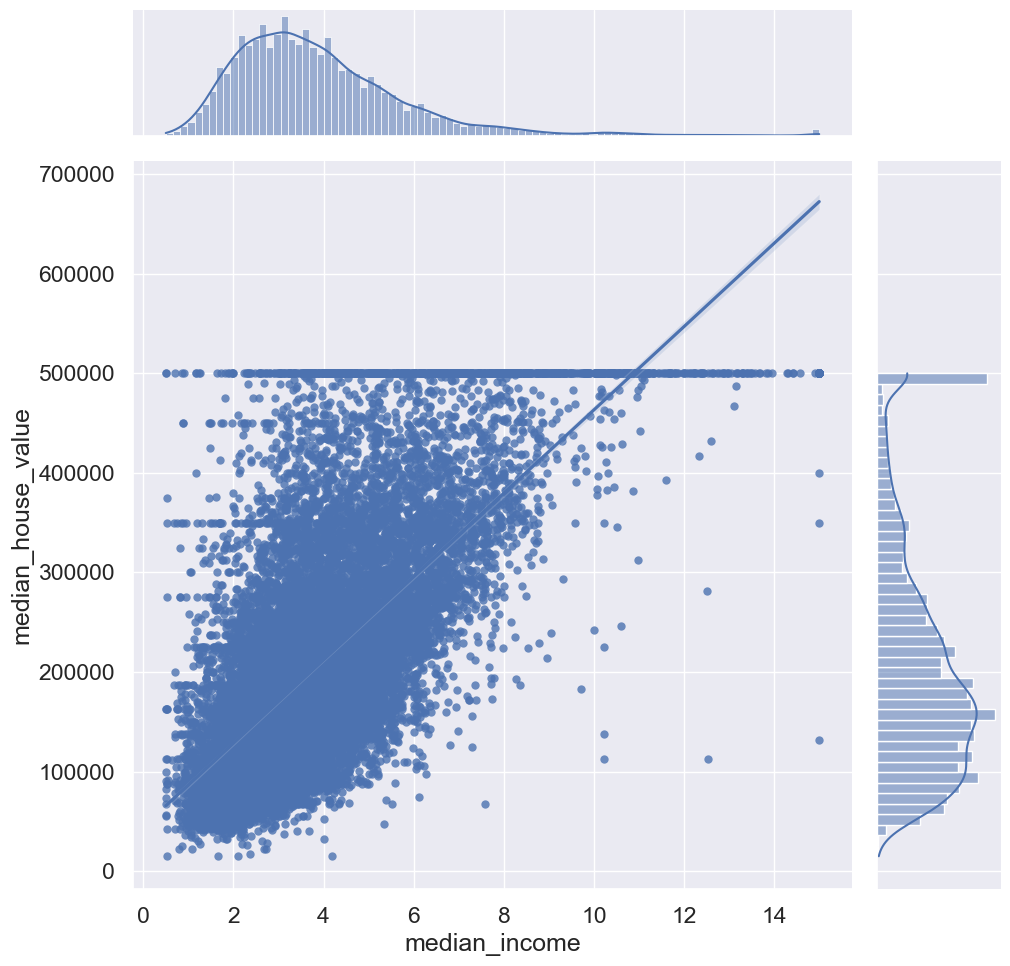

In [62]:
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x = 'median_income', y = 'median_house_value', kind = 'reg', height = 10)

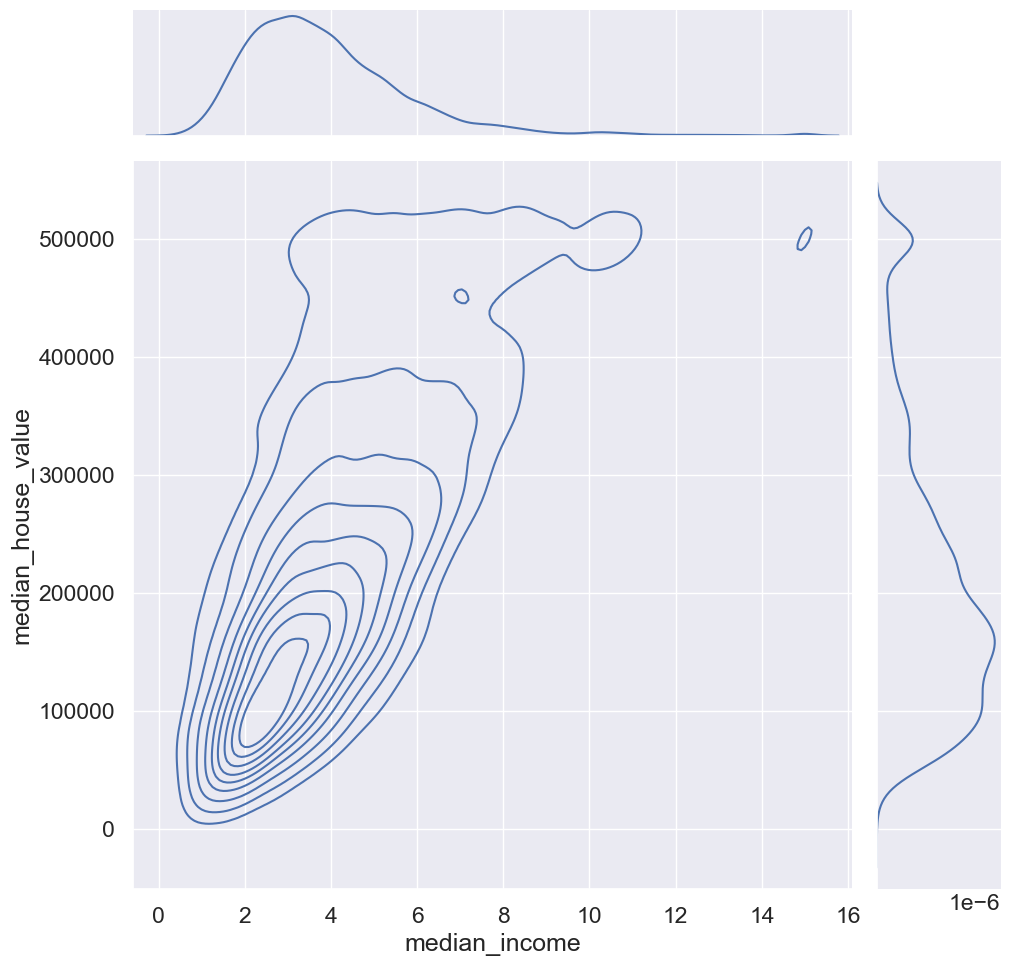

In [63]:
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x = 'median_income', y = 'median_house_value', kind = 'kde', height = 10)

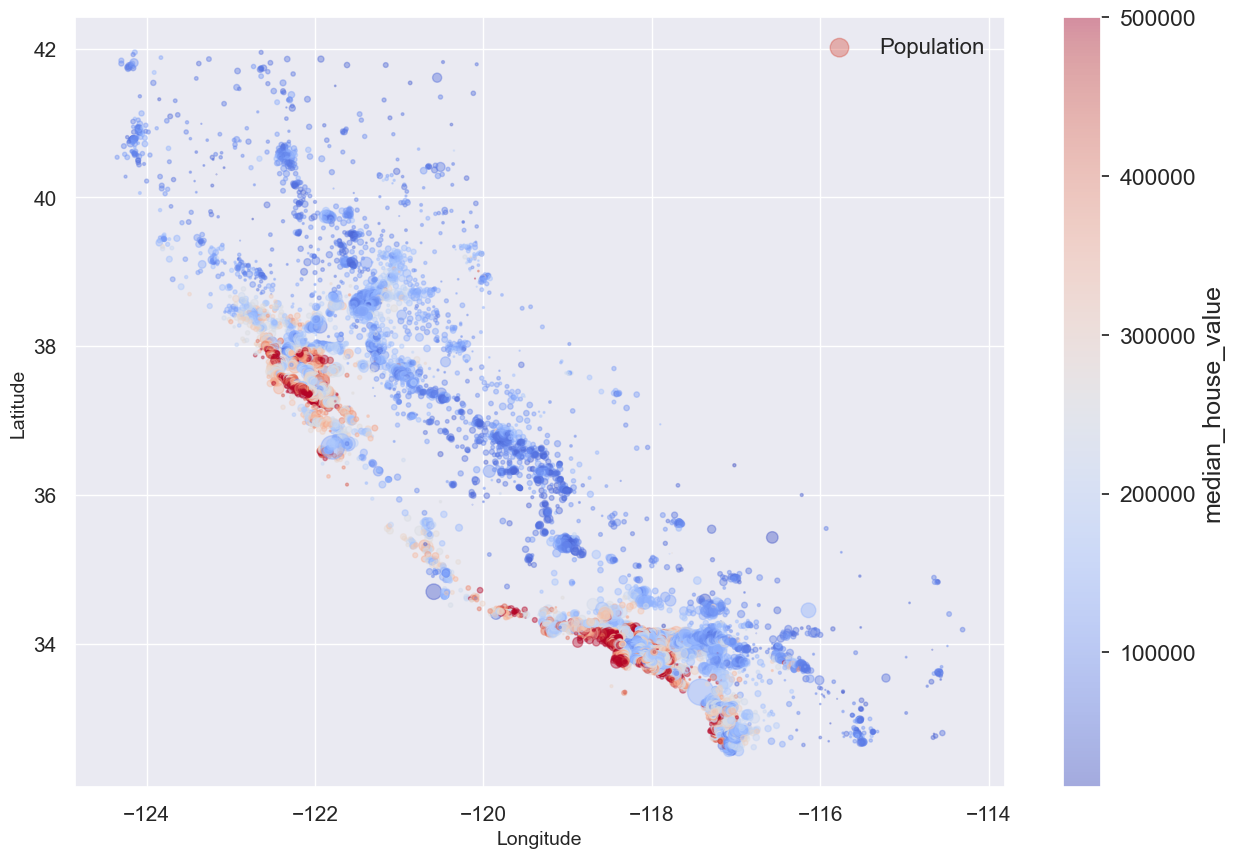

In [64]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15, sharex = False)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [65]:
import matplotlib.image as mpimg


In [66]:
california_img = mpimg.imread('csv/california.png')

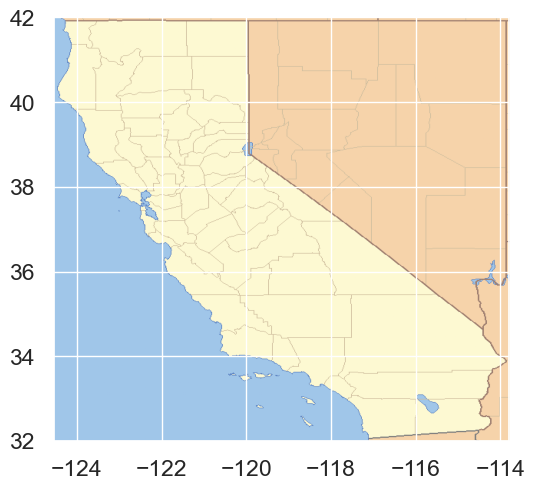

In [67]:
plt.imshow(california_img, extent = [-124.55, -113.80, 32, 42 ])

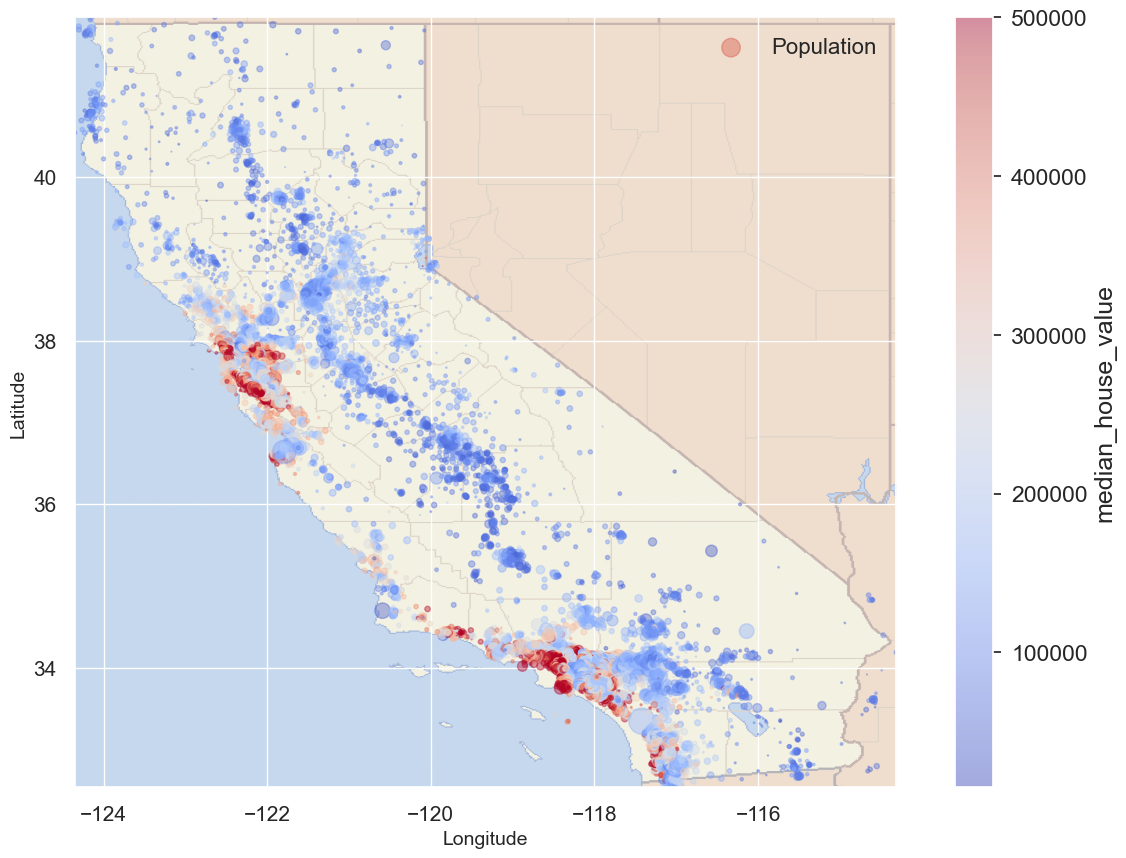

In [68]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15, sharex = False)
plt.imshow(california_img, extent = [-124.35, -114.31, 32.54, 41.95], alpha = 0.5)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [69]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


In [70]:
prox = df.ocean_proximity.unique()

In [71]:
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [72]:
df_loc = df[df.ocean_proximity == prox[2]].copy()

In [73]:
df_loc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0,INLAND,6.153846,2.461538,0.163281
957,-121.90,37.66,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0,INLAND,6.634081,2.803587,0.153711
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0,INLAND,7.811189,2.986014,0.120859
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0,INLAND,7.053726,2.674177,0.153317
968,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0,INLAND,6.925926,2.891975,0.134135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


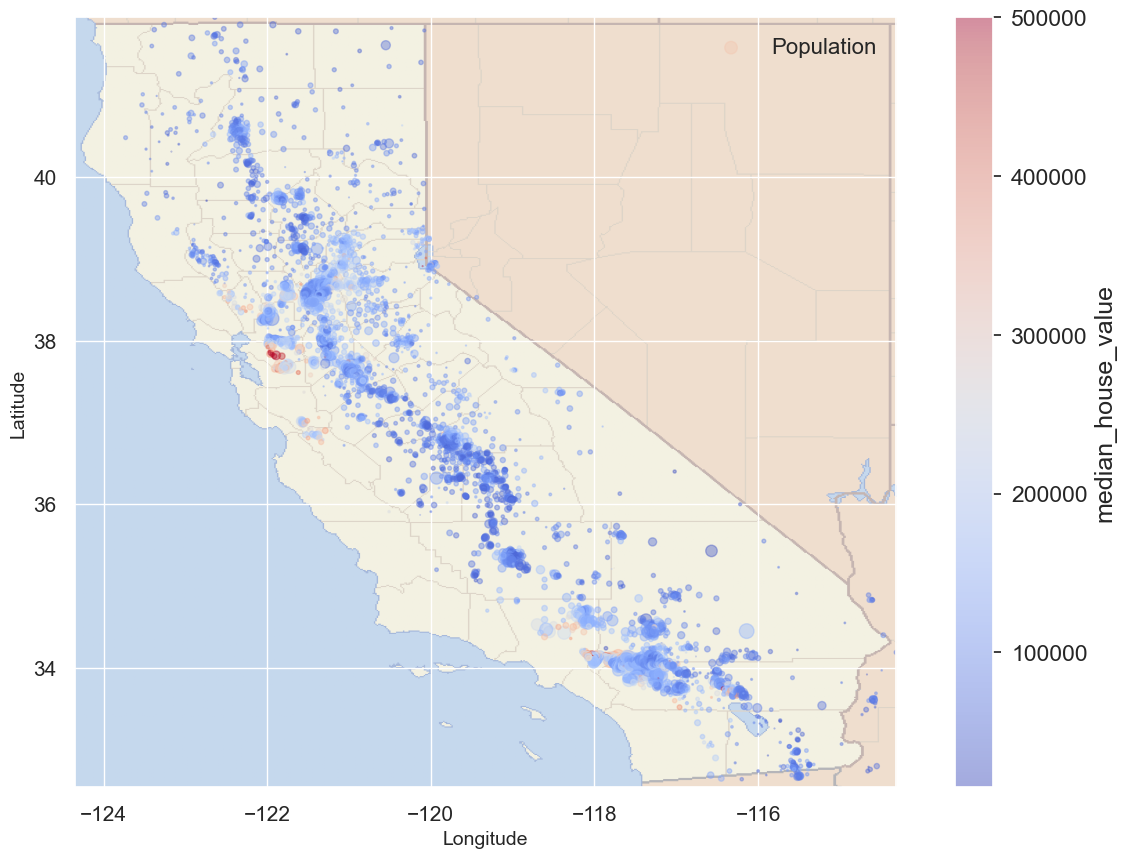

In [74]:
df_loc.plot(kind="scatter", x="longitude", y="latitude",
                       s=df_loc.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15, sharex = False)

plt.imshow(california_img, extent = [-124.35, -114.31, 32.54, 41.95], alpha = 0.5)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

<AxesSubplot:>

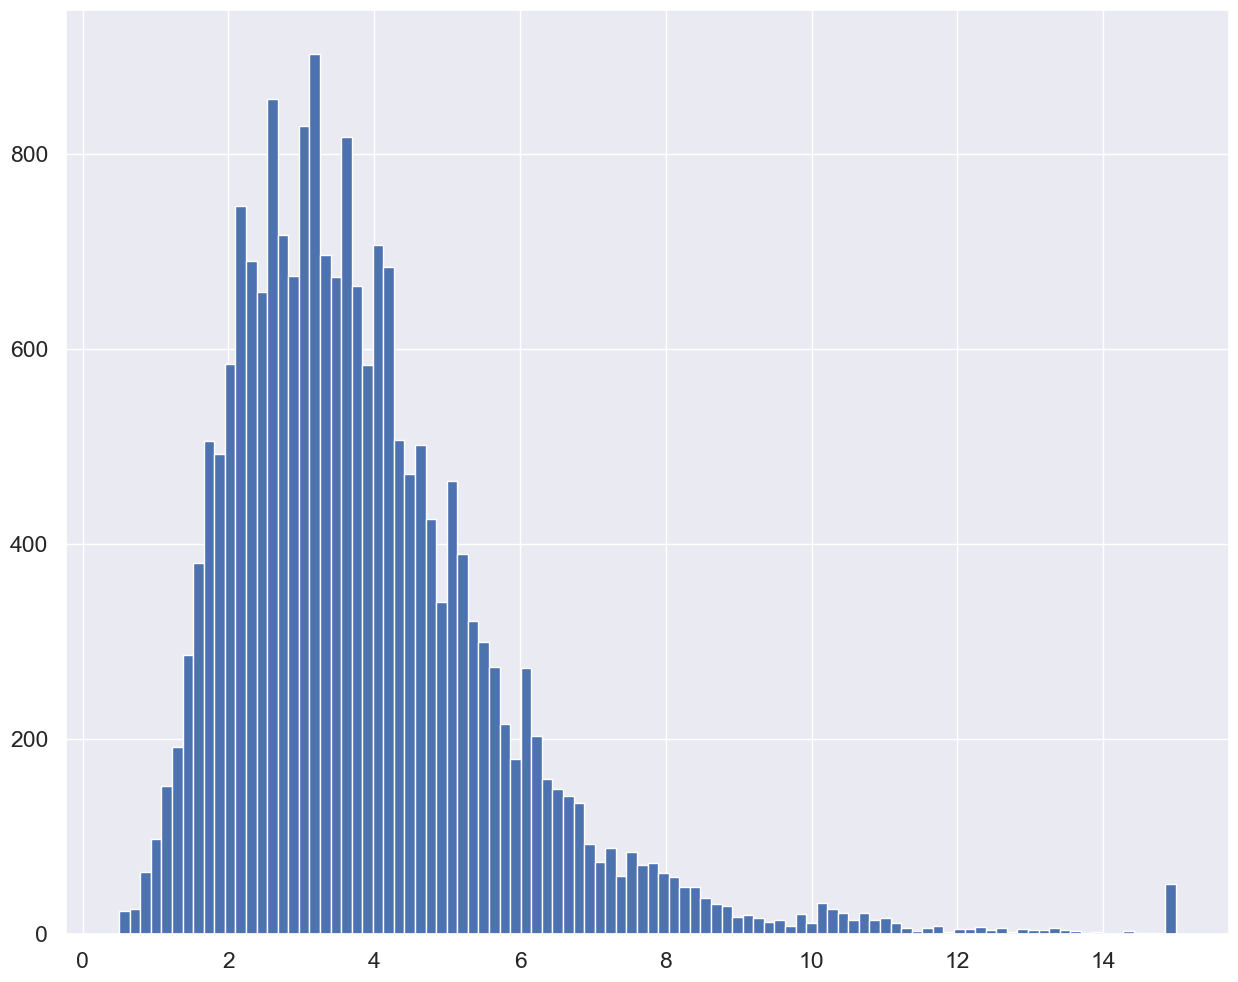

In [75]:
df.median_income.hist(bins = 100, figsize = (15,12))

In [76]:
pd.qcut(df.median_income, [0, 0.25, 0.5, 0.75, 0.95, 1], labels = ['Low','Below_Average','Above_Average','High','Very High'])

0            Very High
1            Very High
2                 High
3                 High
4        Above_Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: median_income, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very High']

In [77]:
df['income_category'] = pd.qcut(df.median_income, [0, 0.25, 0.5, 0.75, 0.95, 1], labels = ['Low','Below_Average','Above_Average','High','Very High'])

In [78]:
df.income_category.value_counts(normalize=True)

Low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.199922
Very High        0.050017
Name: income_category, dtype: float64

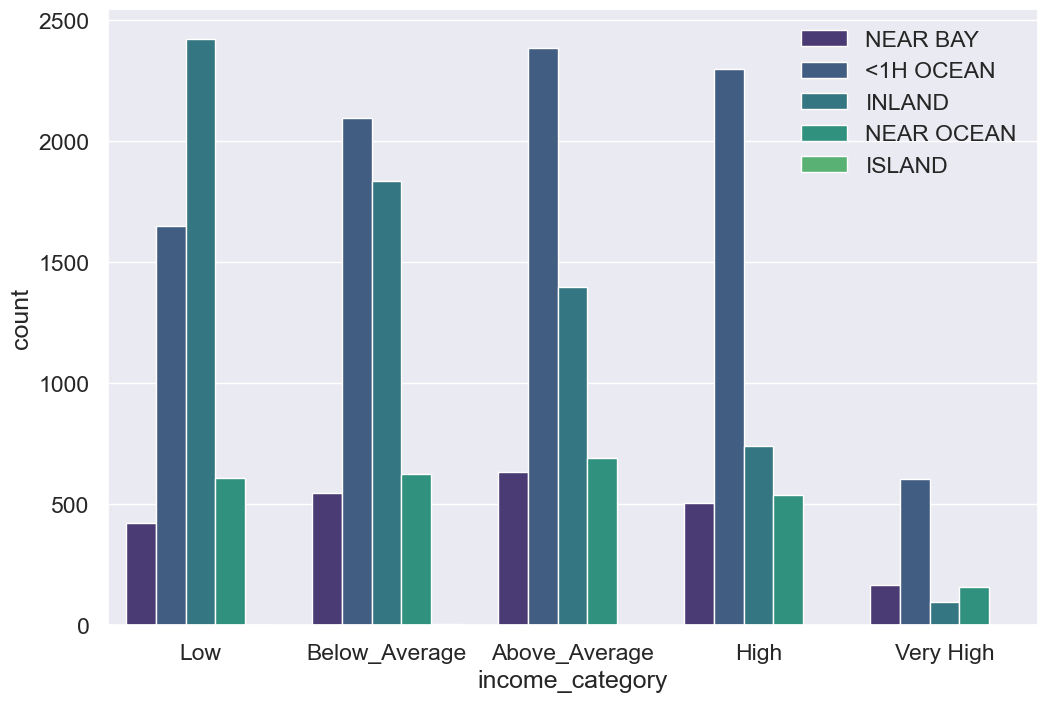

In [79]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5, palette = 'viridis')
sns.countplot(data = df, x = 'income_category', hue = 'ocean_proximity')
plt.legend(loc=1)

<AxesSubplot:xlabel='income_category', ylabel='median_house_value'>

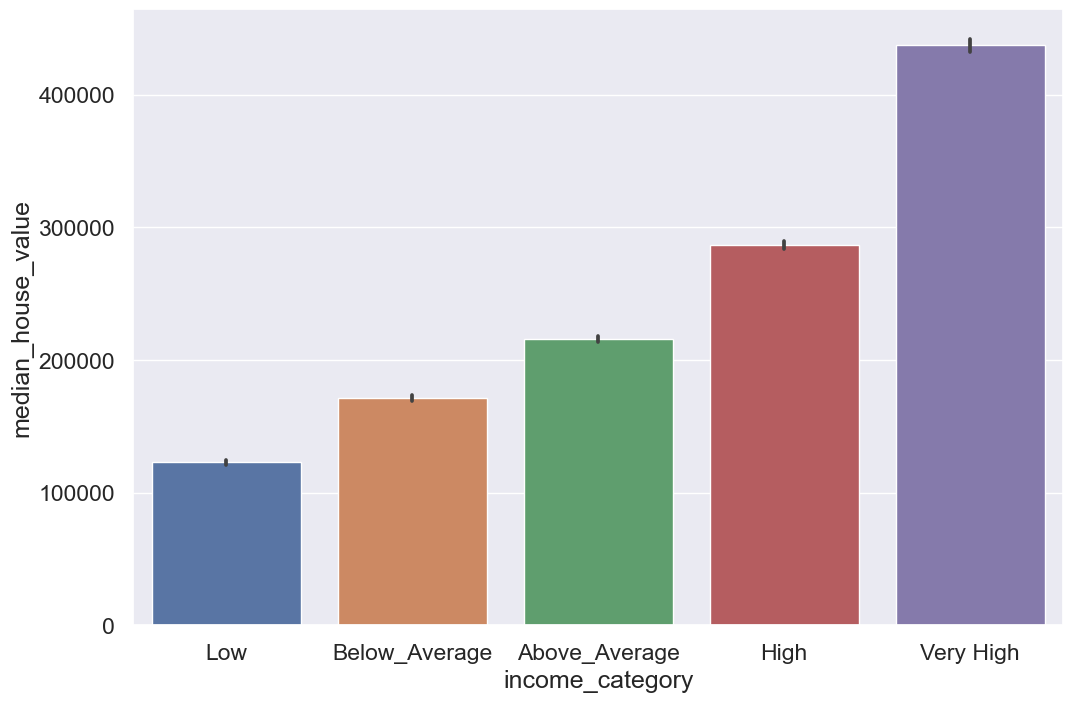

In [80]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
sns.barplot(data = df, x = 'income_category', y='median_house_value', dodge = True)

In [81]:
matric = df.groupby(['income_category','ocean_proximity']).median_house_value.mean().unstack().drop(columns = ['ISLAND'])

In [82]:
matrix = matric.astype('int')

<AxesSubplot:xlabel='ocean_proximity', ylabel='income_category'>

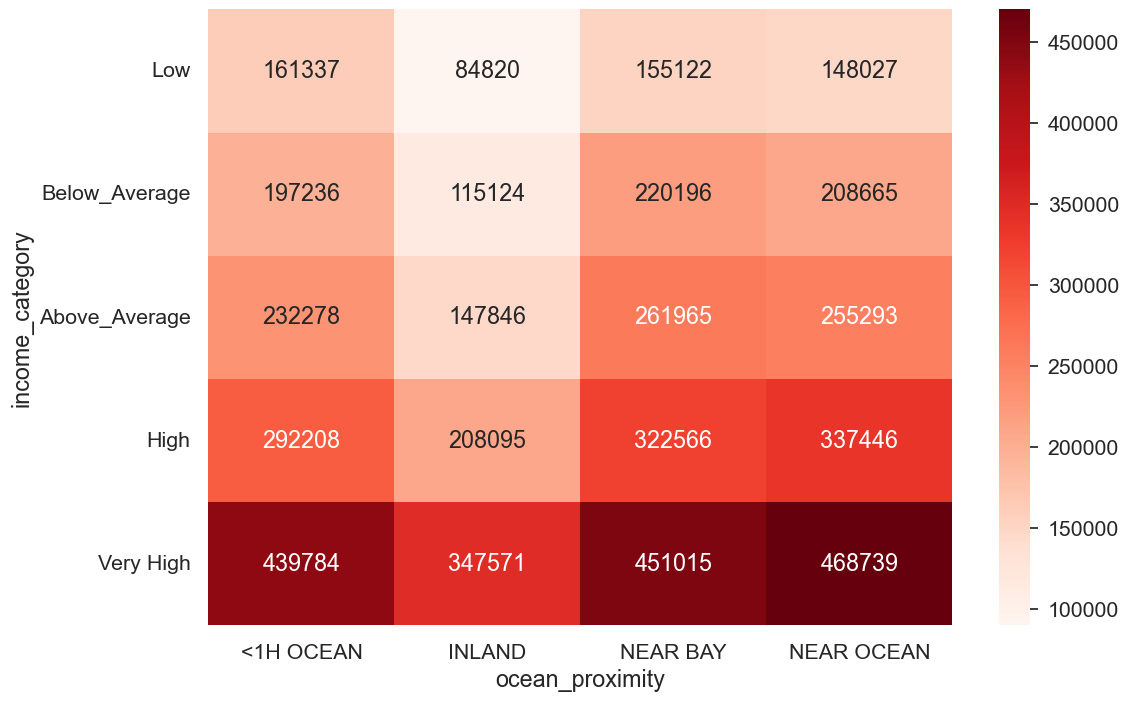

In [83]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(data = matrix, cmap='Reds', annot = True, fmt = 'd', vmin = 90000, vmax = 470000)

In [84]:
label = df.median_house_value.copy()
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [85]:
features = df.drop(columns = ['median_house_value'])
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,0.146591,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,0.155797,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,0.172096,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,2.560606,0.224625,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,3.122807,0.215208,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,2.325635,0.215173,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,2.123209,0.219892,Low


In [86]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20433 non-null  float64 
 1   latitude             20433 non-null  float64 
 2   housing_median_age   20433 non-null  float64 
 3   total_rooms          20433 non-null  float64 
 4   total_bedrooms       20433 non-null  float64 
 5   population           20433 non-null  float64 
 6   households           20433 non-null  float64 
 7   median_income        20433 non-null  float64 
 8   ocean_proximity      20433 non-null  object  
 9   rooms_per_household  20433 non-null  float64 
 10  pop_per_household    20433 non-null  float64 
 11  bedrooms_per_room    20433 non-null  float64 
 12  income_category      20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory usage: 2.6+ MB


In [87]:
features.select_dtypes('float')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,0.219892


In [88]:
import scipy.stats as stats

In [89]:
feat1 = features.select_dtypes('float').apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204


In [90]:
pd.options.display.float_format = '{:.2f}'.format

In [91]:
feat1.agg(['mean','std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [92]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [93]:
dummies = pd.get_dummies(features.ocean_proximity) 
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [94]:
features = pd.concat([feat1, dummies, df.income_category], axis = 1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_category
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


In [95]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_category
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


In [96]:
test_size = 0.2

In [100]:
X_test = features.sample(frac = test_size, random_state = 123)

In [101]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_category
14354,1.17,-1.35,-0.45,-0.10,0.27,-0.13,0.25,-0.39,-0.56,-0.09,0.99,0,0,0,0,1,Below_Average
12908,-0.86,1.40,-0.37,0.11,-0.03,-0.12,-0.03,-0.29,0.18,-0.04,-0.51,0,1,0,0,0,Below_Average
19545,-0.70,0.93,0.82,-0.13,0.16,0.55,0.28,-1.14,-0.62,0.03,0.76,0,1,0,0,0,Low
12188,1.11,-0.91,-1.40,-0.64,-0.72,-0.74,-0.81,-0.40,0.42,-0.00,-0.36,1,0,0,0,0,Below_Average
14786,1.22,-1.43,-0.61,-0.41,-0.58,-0.39,-0.53,0.50,0.16,0.02,-0.75,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,-0.69,0.61,0.01,0.41,0.11,1.43,0.77,0.04,-1.33,1,0,0,0,0,High
3614,0.58,-0.65,0.74,-0.98,-1.04,-0.90,-1.04,-0.39,-0.21,0.09,-0.12,1,0,0,0,0,Below_Average
19296,-1.62,1.30,0.90,-0.11,-0.27,-0.33,-0.19,0.01,0.09,-0.06,-0.64,1,0,0,0,0,Above_Average
5826,0.63,-0.68,1.86,-0.43,-0.62,-0.60,-0.62,0.49,0.43,-0.02,-0.87,1,0,0,0,0,High


In [103]:
X_test.income_category.value_counts(normalize=True)

Above_Average   0.25
Below_Average   0.25
Low             0.25
High            0.20
Very High       0.05
Name: income_category, dtype: float64

In [104]:
X_test.index

Int64Index([14354, 12908, 19545, 12188, 14786,  9941,  3179,  4650, 15550,
            17190,
            ...
             3992, 10261, 10862, 10863, 13864, 10262,  3614, 19296,  5826,
            15383],
           dtype='int64', length=4087)

In [117]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_category
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


In [118]:
X_train.income_category.value_counts(normalize=True)

Low             0.25
Below_Average   0.25
Above_Average   0.25
High            0.20
Very High       0.05
Name: income_category, dtype: float64

In [120]:
X_train = X_train.sample(frac = 1, random_state = 123)

In [122]:
X_train.drop(columns= ['income_category'],inplace=True)

In [123]:
X_test.drop(columns= ['income_category'],inplace=True)

In [127]:
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]

In [128]:
y_train

9896    218100.00
6749    257200.00
13825    64800.00
2842     73100.00
10112   241100.00
           ...   
15460    87500.00
1689    184800.00
14698   177700.00
19870   132000.00
4461    153100.00
Name: median_house_value, Length: 16346, dtype: float64

# Random Forest Regression

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 500,
                                  max_features = 'sqrt', max_depth = 75, min_samples_split = 2)


In [133]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [134]:
forest_reg.score(X_train,y_train)

0.9758470860678036

In [135]:
from sklearn.metrics import mean_squared_error

In [136]:
pred = forest_reg.predict(X_train)
pred

array([238374.608, 246813.8  ,  74191.4  , ..., 184930.402, 117595.4  ,
       187186.008])

In [137]:
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18023.671210966968

In [138]:
forest_reg.score(X_test,y_test)

0.825152593253362

In [139]:
pred = forest_reg.predict(X_test)
pred

array([224965.808, 129246.8  ,  67903.   , ..., 222406.402, 322985.02 ,
       268692.8  ])

In [140]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47348.34022326726

In [141]:
comp = pd.DataFrame(data = {"True_V": y_test, 'Pred':pred})
comp

,True_V,Pred
14354,101800.00,224965.81
12908,213000.00,129246.80
19545,58800.00,67903.00
12188,111300.00,187250.02
14786,174100.00,160228.40
...,...,...
10262,272200.00,296562.20
3614,175900.00,183863.20
19296,215900.00,222406.40
5826,326100.00,322985.02


In [142]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

14354   123165.81
12908    83753.20
19545     9103.00
12188    75950.02
14786    13871.60
           ...   
10262    24362.20
3614      7963.20
19296     6506.40
5826      3114.98
15383    22807.20
Length: 4087, dtype: float64

In [144]:
forest_reg.feature_importances_ 

array([8.43251997e-02, 7.63824246e-02, 4.20571593e-02, 2.28712182e-02,
       2.01285036e-02, 2.28577613e-02, 1.96337714e-02, 2.80813190e-01,
       6.50088158e-02, 9.89248218e-02, 9.71199460e-02, 1.91328297e-02,
       1.36700488e-01, 2.65441330e-04, 5.35959721e-03, 8.41883258e-03])

In [148]:
feature_imp = pd.Series(data = forest_reg.feature_importances_ ,
                       index = X_train.columns).sort_values(ascending=False)

In [ ]:
feature_imp 

<AxesSubplot:>

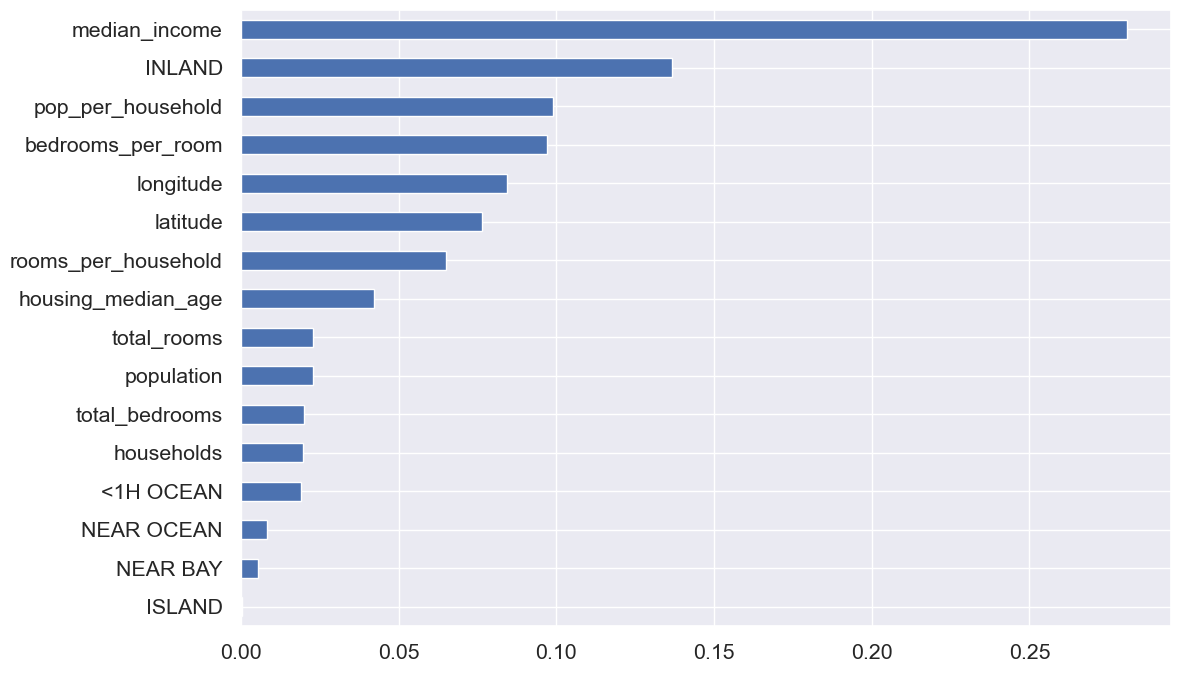

In [156]:
feature_imp.sort_values(ascending=True).plot.barh(figsize = (12,8))